In [5]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy.ndimage.morphology import grey_closing

In [13]:
from torchvision import  transforms

In [35]:
import torchvision.transforms.functional as F

In [8]:
filenames = glob.glob('/media/hpc4_Raid/dsungatullina/transfer-to-zhores/SYNTHIA/RAND_CITYSCAPES/Depth_1024x608/train/*.tif')
filenames.sort()
print(len(filenames))

8000


In [9]:
depth = cv2.imread(filenames[0], cv2.IMREAD_UNCHANGED)

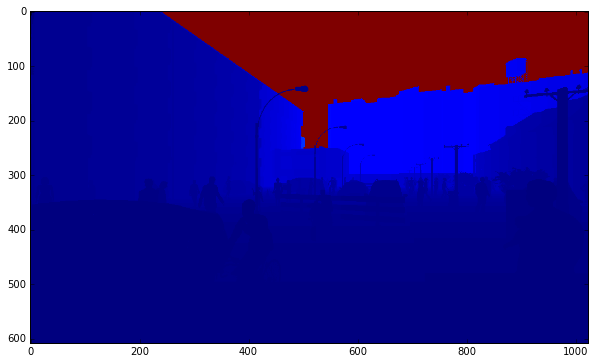

In [10]:
plt.figure(figsize=(10,20))
plt.imshow(depth)
plt.show()

In [11]:
print(depth.min(), depth.mean(), depth.max())

(1.9, 122.80512014288651, 655.35)


In [12]:
depth.shape

(608, 1024)

In [14]:
trans_cencrop = transforms.CenterCrop(224)

In [16]:
depth.size

622592

In [15]:
tmp = trans_cencrop(depth)

TypeError: 'int' object is not iterable

In [18]:
img = Image.fromarray(depth)

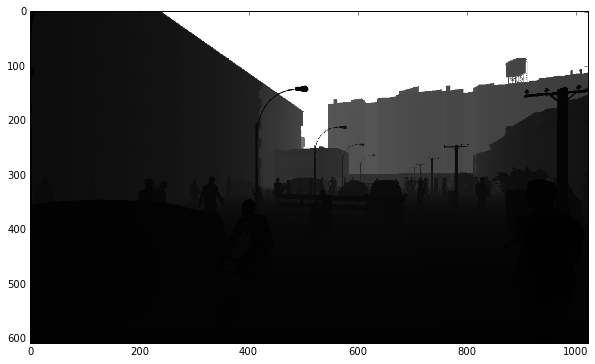

In [19]:
plt.figure(figsize=(10,20))
plt.imshow(img)
plt.show()

In [24]:
tmp2 = np.array(img)

In [25]:
print(tmp2.min(), tmp2.mean(), tmp2.max())

(1.9, 122.80515, 655.35)


In [29]:
img.getextrema()

(1.899999976158142, 655.3499755859375)

In [31]:
img.size

(1024, 608)

In [32]:
img2 = trans_cencrop(img)

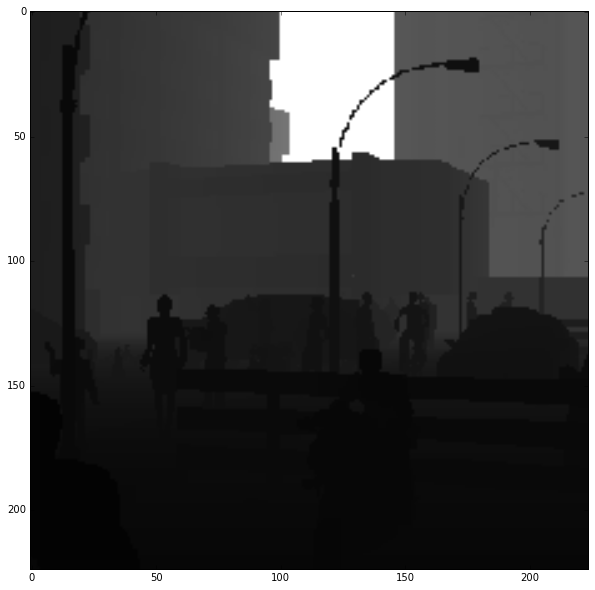

(3.0199999809265137, 655.3499755859375)


In [34]:
plt.figure(figsize=(10,20))
plt.imshow(img2)
plt.show()

print(img2.getextrema())

In [36]:
img3 = F.hflip(img)

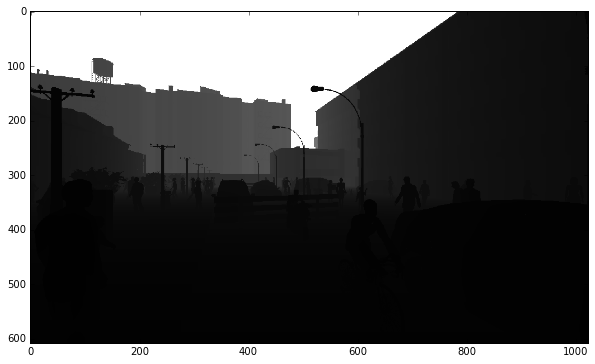

(1.899999976158142, 655.3499755859375)


In [37]:
plt.figure(figsize=(10,20))
plt.imshow(img3)
plt.show()

print(img3.getextrema())

In [39]:
img4 = F.rotate(img, 5)

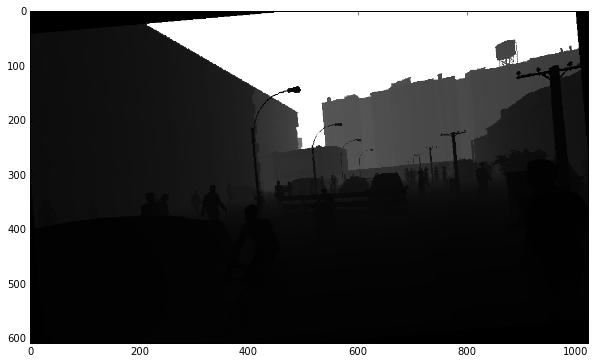

(0.0, 655.3499755859375)


In [40]:
plt.figure(figsize=(10,20))
plt.imshow(img4)
plt.show()

print(img4.getextrema())

In [42]:
to_tensor = transforms.ToTensor()

In [43]:
img_tensor = to_tensor(img)

In [44]:
print(img_tensor.min(), img_tensor.mean(), img_tensor.max())

(tensor(1.9000), tensor(122.8051), tensor(655.3500))


In [45]:
img_tensor.size()

torch.Size([1, 608, 1024])